In [ ]:
!pip install scanpy scikit-misc muon

     |████████████████████████████████| 2.0 MB 20.0 MB/s 
     |████████████████████████████████| 8.8 MB 43.8 MB/s 
     |████████████████████████████████| 287 kB 50.7 MB/s 
     |████████████████████████████████| 86 kB 4.0 MB/s 
     |████████████████████████████████| 96 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 32.3 MB/s 
     |████████████████████████████████| 4.8 MB 55.9 MB/s 
     |████████████████████████████████| 48 kB 3.5 MB/s 
     |████████████████████████████████| 91 kB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=c38b4a5385c154b57735a62b5fc5be0a3e9760cacd17a2b03c720de799258af4
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=8ecbe853257ae8fb88bf5b69b236a30740a7aaae9a46959fd7c13f4b868b5603
  Sto

In [ ]:
from google.colab import drive
drive.mount('/MultiClusterGAN')
%cd /MultiClusterGAN/MyDrive/scArches/

Mounted at /MultiClusterGAN
/MultiClusterGAN/.shortcut-targets-by-id/1jRkKMpfpk0mKzVyR0C5NT055y_Jn9Gus/scArches


In [ ]:
import anndata as ad
import scanpy as sc

In [ ]:
data_path = './data/raw/competition/ATACSeq'
process_data = True

In [ ]:
if process_data:
    adata_all  = sc.read_h5ad(f"{data_path}/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")

    adata_atac = adata_all[:, adata_all.var['feature_types']  == 'ATAC']
    adata_gex  = adata_all[:, adata_all.var['feature_types']  == 'GEX']

    adata_gex.X = adata_gex.layers["counts"]
    sc.pp.highly_variable_genes(adata_gex, n_top_genes=4000, flavor='seurat_v3')
    adata_gex = adata_gex[:,adata_gex.var['highly_variable']]
    sc.pp.normalize_total(adata_gex)
    sc.pp.log1p(adata_gex)
    sc.pp.scale(adata_gex, max_value=4)

    # adata_atac.X = adata_atac.layers["counts"]
    # ac.pp.tfidf(adata_atac, scale_factor=1e4)
    sc.pp.highly_variable_genes(adata_atac)
    variable_atac_idx = adata_atac.var['highly_variable']
    adata_atac = adata_atac[:,variable_atac_idx]
    adata_atac.X[adata_atac.X.nonzero()] = 1

    adata_atac.obsm['umap'] = adata_atac.obsm['ATAC_umap']

    adata_gex.obsm['umap'] = adata_gex.obsm['GEX_X_umap']

    adata_atac.write(f'{data_path}/atac_processed.h5ad')
    adata_gex.write(f'{data_path}/gex_processed.h5ad')

Trying to set attribute `._uns` of view, copying.
/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Trying to set attribute `._uns` of view, copying.
Trying to set attribute `.X` of view, copying.


In [ ]:
adata_atac = sc.read_h5ad(f'{data_path}/atac_processed.h5ad')
adata_gex  = sc.read_h5ad(f'{data_path}/gex_processed.h5ad')

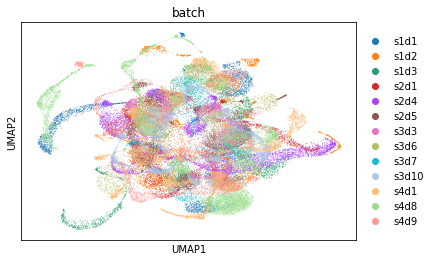

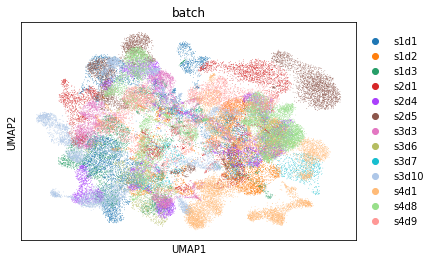

In [ ]:
sc.pl.umap(adata_atac,color=['batch'])
sc.pl.umap(adata_gex,color=['batch'])

In [ ]:
adata_atac

AnnData object with n_obs × n_vars = 69249 × 13634
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'hvg', 'organism', 'batch_colors'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'umap'
    layers: 'counts'

In [ ]:
adata_gex

AnnData object with n_obs × n_vars = 69249 × 4000
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'hvg', 'organism', 'batch_colors'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'umap'
    layers: 'counts'

In [ ]:
[batch for batch in adata_atac.obs['batch'].unique()]

['s1d1',
 's1d2',
 's1d3',
 's2d1',
 's2d4',
 's2d5',
 's3d3',
 's3d6',
 's3d7',
 's3d10',
 's4d1',
 's4d8',
 's4d9']